# Slooze Inventory, Sales and Purchase Analysis
### Demand Forecasting and Inventory Optimization


## Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [3]:
beg_inv = pd.read_csv("BegInvFINAL12312016.csv")
end_inv = pd.read_csv("EndInvFINAL12312016.csv")

print(beg_inv.shape)
print(end_inv.shape)

(206529, 9)
(224489, 9)


More records are available at the end of year

In [5]:
beg_inv.head()


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [7]:
end_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [93]:
end_inv.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')

In [9]:
beg_inv.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')

In [11]:
sales = pd.read_csv("SalesFINAL12312016.csv", low_memory=False)
print(sales.shape)

(1048575, 14)


In [89]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [13]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [91]:
sales['SalesDate'].head()

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-08
4   2016-01-09
Name: SalesDate, dtype: datetime64[ns]

In [15]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

In [17]:
sales['SalesDate'].head()

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-08
4   2016-01-09
Name: SalesDate, dtype: datetime64[ns]

In [19]:
sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [21]:
sales = sales.dropna(subset=['SalesQuantity'])

#### Daily Sales summary

In [23]:
daily_sales = sales.groupby('SalesDate')['SalesQuantity'].sum().reset_index()

In [25]:
daily_sales.head()

,SalesDate,SalesQuantity
0,2016-01-01,49911
1,2016-01-02,93114
2,2016-01-03,53037
3,2016-01-04,41341
4,2016-01-05,40831


##### Constructing Graph 

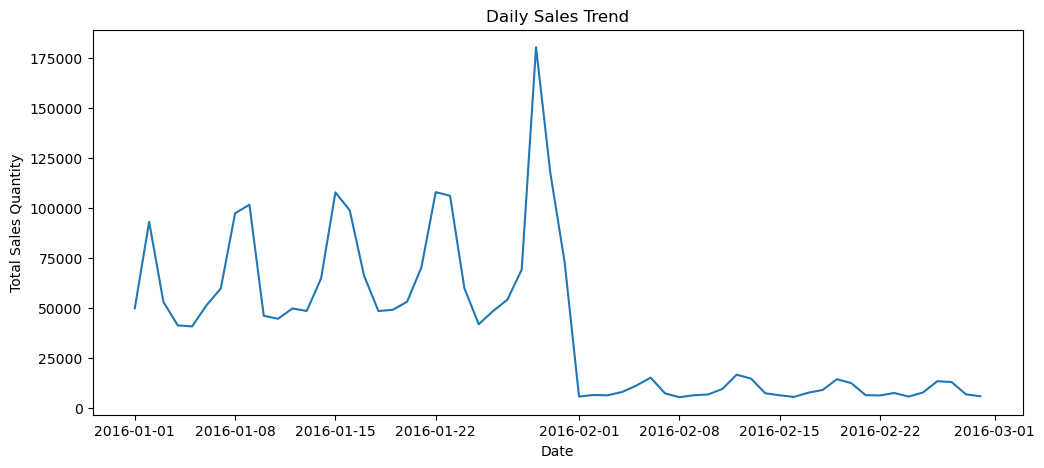

In [27]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['SalesDate'], daily_sales['SalesQuantity'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Quantity")
plt.show()


1) Repeated peaks => weekend sales are higher and weekday sales are lower
2) Big spike around the end of january
3) Drop after February start => season end or stock shortage or demand drop

### Create Monthly Sales

In [44]:
monthly_sales = sales.groupby(pd.Grouper(key='SalesDate', freq='ME'))['SalesQuantity'].sum().reset_index()


In [46]:
monthly_sales

,SalesDate,SalesQuantity
0,2016-01-31,2194959
1,2016-02-29,256210


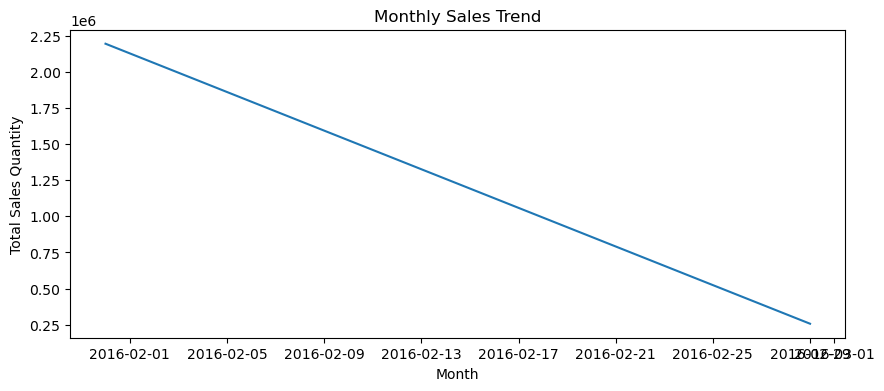

In [48]:
plt.figure(figsize=(10,4))
plt.plot(monthly_sales['SalesDate'], monthly_sales['SalesQuantity'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Quantity")
plt.show()


As only 2 months data is available daily forcast works better

## Demand Forecasting (Moving Average)

In [53]:
daily_sales['MA_7'] = daily_sales['SalesQuantity'].rolling(window=7).mean()

In [55]:
daily_sales.tail()

,SalesDate,SalesQuantity,MA_7
55,2016-02-25,7777,8677.714286
56,2016-02-26,13416,8531.714286
57,2016-02-27,13011,8611.857143
58,2016-02-28,6866,8668.428571
59,2016-02-29,5905,8609.571429


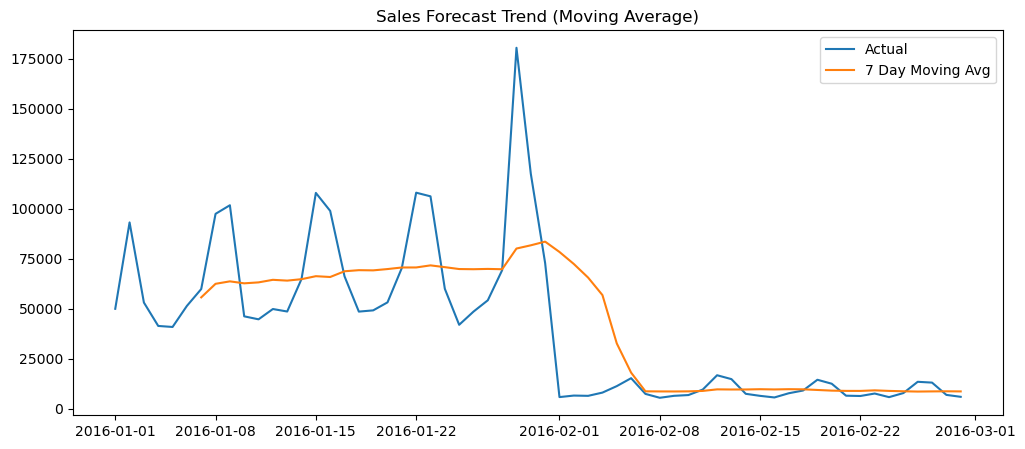

In [57]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['SalesDate'], daily_sales['SalesQuantity'], label='Actual')
plt.plot(daily_sales['SalesDate'], daily_sales['MA_7'], label='7 Day Moving Avg')
plt.legend()
plt.title("Sales Forecast Trend (Moving Average)")
plt.show()


## ABC Inventory Classification

In [59]:
product_sales = sales.groupby('InventoryId')['SalesDollars'].sum().reset_index()

In [61]:
product_sales.head()

,InventoryId,SalesDollars
0,10_HORNSEY_1000,16.99
1,10_HORNSEY_1001,65.89
2,10_HORNSEY_10030,19.98
3,10_HORNSEY_1005,209.94
4,10_HORNSEY_10057,155.88


In [63]:
product_sales = product_sales.sort_values(by='SalesDollars', ascending=False)

In [65]:
product_sales['cum_percent'] = product_sales['SalesDollars'].cumsum() / product_sales['SalesDollars'].sum() * 100

In [67]:
def abc_class(percent):
    if percent <= 70:
        return 'A'
    elif percent <= 90:
        return 'B'
    else:
        return 'C'

product_sales['ABC_Category'] = product_sales['cum_percent'].apply(abc_class)

In [69]:
product_sales['ABC_Category'].value_counts()

ABC_Category
C    85125
B    48205
A    36801
Name: count, dtype: int64

36k products generate most revenue \
85k products generate very little money

#### Plot ABC Bar Chart

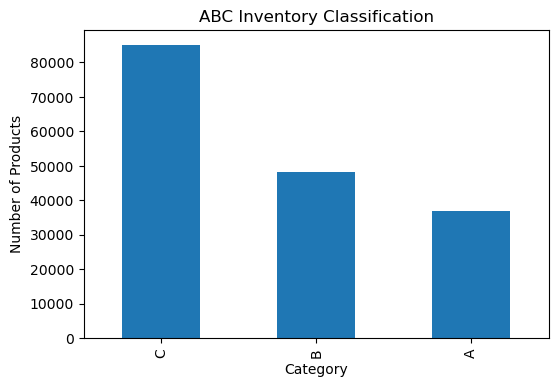

In [71]:
abc_counts = product_sales['ABC_Category'].value_counts()

plt.figure(figsize=(6,4))
abc_counts.plot(kind='bar')
plt.title("ABC Inventory Classification")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

## Lead Time and Reorder Point Analysis

In [73]:
purchases = pd.read_csv("PurchasesFINAL12312016.csv", low_memory=False)

In [75]:
purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

In [77]:
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

In [79]:
purchases['LeadTime'].describe()

count    2.372474e+06
mean     7.620739e+00
std      2.208890e+00
min      3.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.400000e+01
Name: LeadTime, dtype: float64

In [81]:
avg_daily_demand = daily_sales['SalesQuantity'].mean()
print("Average Daily Demand:", avg_daily_demand)


Average Daily Demand: 40852.816666666666


In [83]:
avg_lead_time = purchases['LeadTime'].mean()

reorder_point = avg_daily_demand * avg_lead_time

print("Reorder Point:", reorder_point)


Reorder Point: 311328.65085030085


In [85]:
avg_inventory = (beg_inv['onHand'].sum() + end_inv['onHand'].sum()) / 2
print("Average Inventory:", avg_inventory)


Average Inventory: 4552525.5


In [87]:
total_sales_qty = sales['SalesQuantity'].sum()

inventory_turnover = total_sales_qty / avg_inventory

print("Inventory Turnover Ratio:", inventory_turnover)


Inventory Turnover Ratio: 0.5384196090719316


#### Inventory turnover ratio is low means : 
Stock moving slowly \
Overstocking \
Capital locked 

##### Company should reduce low-priority (C category) inventory and focus on A category products.


## Key Business Insights

1. Average daily demand is around 40,000 units indicating high sales volume.

2. Reorder point is approximately 3.1 lakh units. This helps avoid stock shortages by placing purchase orders on time.

3. Inventory turnover ratio is low (0.53) which indicates overstocking risk. Reducing low priority C category items can improve efficiency.

4. ABC analysis shows that a small number of products generate most revenue. Priority stock management should focus on A category products.

5. Lead time averages around 8 days. Supplier planning should consider this for procurement optimization.
